In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import xlrd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Skripsi Abdul Hakim/piton skripsi

Mounted at /content/drive
/content/drive/MyDrive/Skripsi Abdul Hakim/piton skripsi


Reference

1. https://medium.com/bukalapak-data/time-series-anomaly-detection-simple-yet-powerful-approaches-4449ffe1ca12
2. https://blog.paperspace.com/anomaly-detection-isolation-forest/

# Read Data (Test : Cinta Jaya 1)

In [3]:
location = "Cinta Jaya 1"
df = pd.read_pickle("date/" + location + ".pkl")
df

,date,location,rain,soil,gwl,temp
0,2018-11-10 11:40:00,Cinta Jaya 1,0.4,3.2,0.769,30.7
1,2018-11-10 11:50:00,Cinta Jaya 1,0.0,3.2,0.771,30.7
2,2018-11-10 12:00:00,Cinta Jaya 1,0.0,3.2,0.778,30.7
3,2018-11-10 12:10:00,Cinta Jaya 1,0.0,3.2,0.778,31.1
4,2018-11-10 12:20:00,Cinta Jaya 1,0.0,3.2,0.786,31.1
...,...,...,...,...,...,...
61286,2020-01-10 02:00:00,Cinta Jaya 1,0.0,29.0,1.274,29.5
61287,2020-01-10 02:10:00,Cinta Jaya 1,0.0,29.0,1.264,29.5
61288,2020-01-10 02:20:00,Cinta Jaya 1,0.0,29.0,1.269,29.5
61289,2020-01-10 02:30:00,Cinta Jaya 1,0.0,28.6,1.272,29.5


In [4]:
df = df.drop(['location'], axis=1)
df = df.set_index('date')
df

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,0.769,30.7
2018-11-10 11:50:00,0.0,3.2,0.771,30.7
2018-11-10 12:00:00,0.0,3.2,0.778,30.7
2018-11-10 12:10:00,0.0,3.2,0.778,31.1
2018-11-10 12:20:00,0.0,3.2,0.786,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,1.274,29.5
2020-01-10 02:10:00,0.0,29.0,1.264,29.5
2020-01-10 02:20:00,0.0,29.0,1.269,29.5


# Adjust Offset Readings

In [5]:
data_offset = pd.read_excel('data/OFFSET.xlsx', engine='openpyxl')
data_offset

,No,Kode,Desaa,Kecamatan,Kabupaten,Provinsi,LAT,LONG,Offset (cm)
0,1,BRG_160205_01,KEDATON (DEMPLOT),KOTA KAYU AGUNG,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.401407,104.879161,212
1,2,BRG_160205_02,KEDATON,PEDAMARAN,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.423133,104.877100,230
2,3,BRG_160214_01,PADANG SUGIHAN 1 (SM),PANGKALAN LAPAM,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.105565,105.215600,153
3,4,BRG_160214_02,PADANG SUGIHAN 2 (SM),AIR SUGIHAN,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.090585,105.216600,253
4,5,BRG_160214_03,PADANG SUGIHAN 3 (SM),AIR SUGIHAN,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.019940,105.232200,193
5,6,BRG_160219_02,AIR RUMBAI,PANGKALAN LAPAM,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.124240,105.121000,190
6,7,BRG_160224_01,CINTA JAYA 1,PEDAMARAN,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.392495,104.977500,215
7,8,BRG_160224_02,CINTA JAYA 2,PEDAMARAN,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.478628,104.965100,184
8,9,BRG_160224_03,CINTA JAYA 3,PEDAMARAN,OGAN KOMERING ILIR,SUMATERA SELATAN,-3.432265,104.964700,185
9,10,BRG_160609_01,MUARA MEDAK 1,BAYUNG LENCIR,MUSI BANYUASIN,SUMATERA SELATAN,-1.795132,103.928600,210


In [6]:
names = ['Kedaton (Demplot)',
         'Kedaton',
         'Padang Sugihan 1 (SM)',
         'Padang Sugihan 2 (SM)',
         'Padang Sugihan 3 (SM)',
         'Air Rumbai',
         'Cinta Jaya 1',
         'Cinta Jaya 2',
         'Cinta Jaya 3',
         'Muara Medak 1',
         'Muara Medak 2',
         'Karang agung']

offset_values = data_offset['Offset (cm)']/100

In [7]:
offset = {}

for name, values in zip(names, offset_values):
    offset.update({name: values})

offset

{'Kedaton (Demplot)': 2.12,
 'Kedaton': 2.3,
 'Padang Sugihan 1 (SM)': 1.53,
 'Padang Sugihan 2 (SM)': 2.53,
 'Padang Sugihan 3 (SM)': 1.93,
 'Air Rumbai': 1.9,
 'Cinta Jaya 1': 2.15,
 'Cinta Jaya 2': 1.84,
 'Cinta Jaya 3': 1.85,
 'Muara Medak 1': 2.1,
 'Muara Medak 2': 2.3,
 'Karang agung': 2.2}

In [8]:
df['gwl'] = df['gwl'] - offset[location]

In [9]:
df

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,-1.381,30.7
2018-11-10 11:50:00,0.0,3.2,-1.379,30.7
2018-11-10 12:00:00,0.0,3.2,-1.372,30.7
2018-11-10 12:10:00,0.0,3.2,-1.372,31.1
2018-11-10 12:20:00,0.0,3.2,-1.364,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
2020-01-10 02:20:00,0.0,29.0,-0.881,29.5


# Explore and plot data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa30bb3e20>,
      dtype=object)

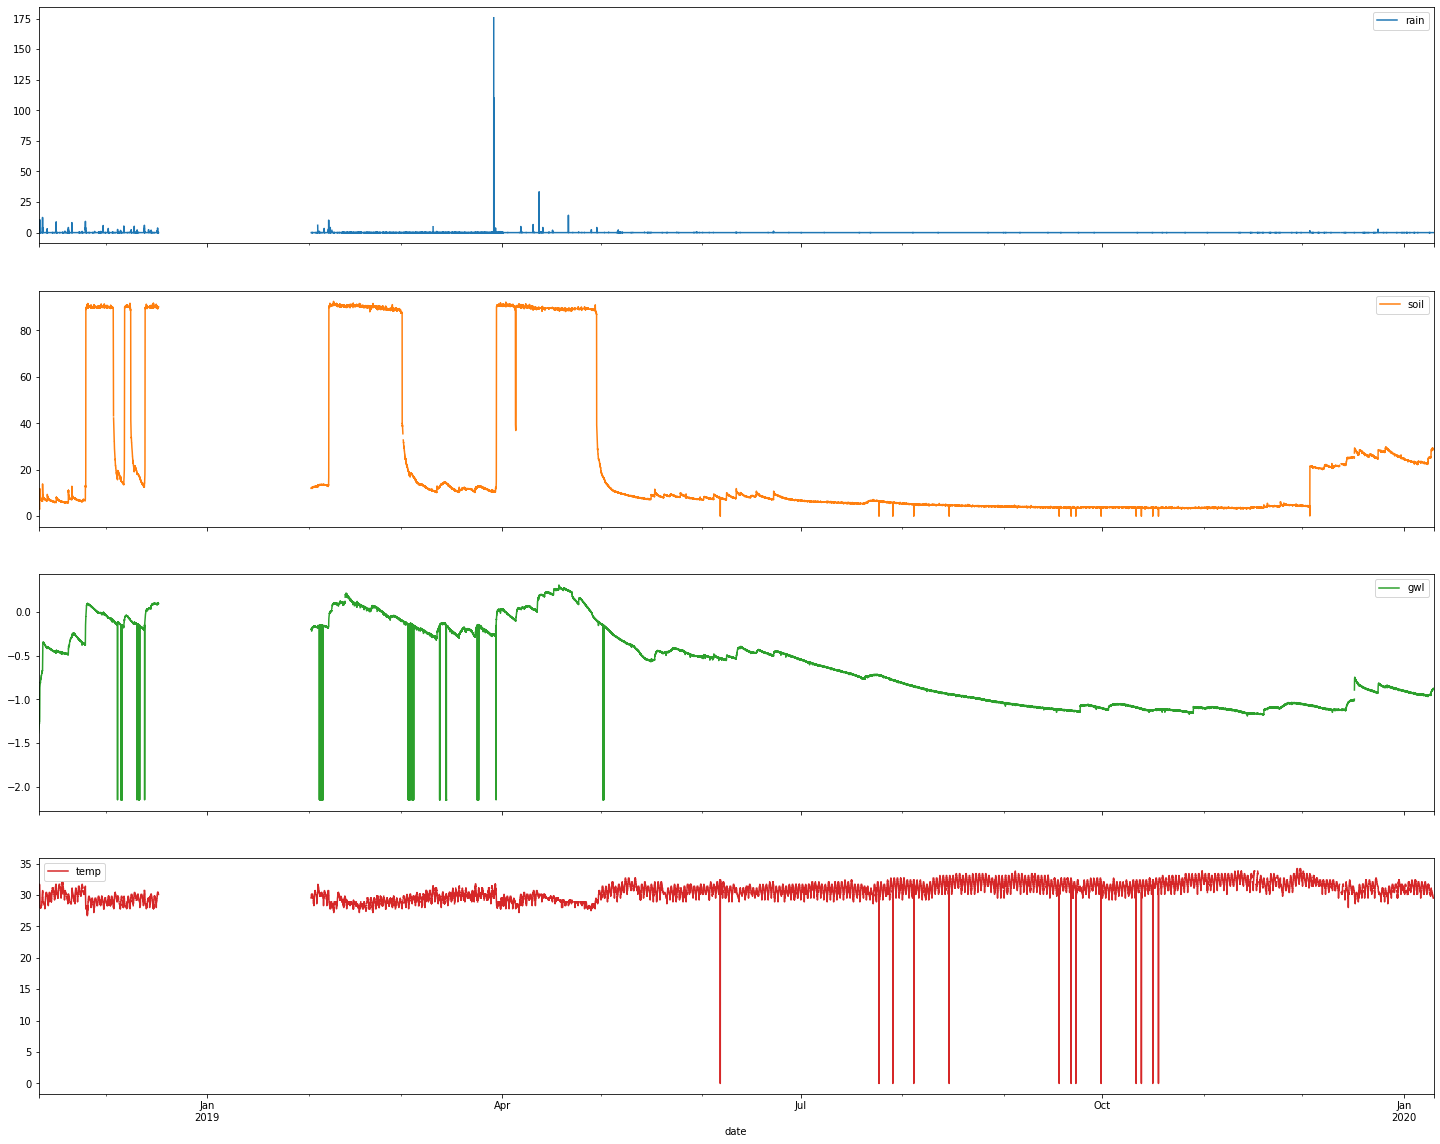

In [10]:
df.plot(subplots=True, figsize=(25,20))

In [11]:
df.describe()

,rain,soil,gwl,temp
count,53321.000000,53324.000000,53324.000000,53324.000000
mean,0.017839,23.381646,-0.609464,30.751718
std,0.995727,31.360885,0.446894,1.383160
min,0.000000,0.000000,-2.150000,0.000000
25%,0.000000,4.400000,-1.059000,29.800000
50%,0.000000,7.900001,-0.629000,30.700000
75%,0.000000,23.000000,-0.202000,31.700000
max,175.800000,92.500000,0.309000,34.200000


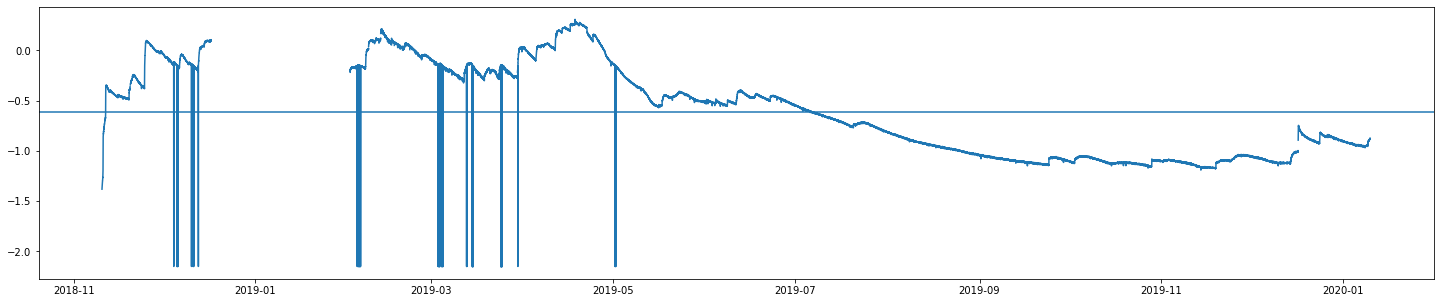

In [12]:
plt.figure(figsize=(25,5))
plt.plot(df['gwl'])
plt.axhline(df['gwl'].mean())

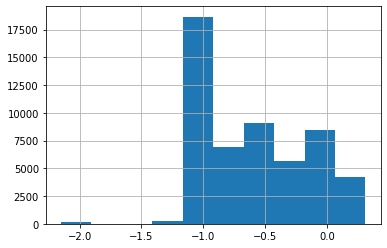

In [13]:
df['gwl'].hist()

# Anomaly detection

Set outlier and missing value to NA

![image](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*5kUgnjnrfJhxL47BeXl1JQ.png)

## FBProphet

In [14]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [25]:
df_fb = df

In [26]:
df_fb = df_fb.drop(['rain', 'temp', 'soil'], axis=1)
df_fb

,gwl
date,
2018-11-10 11:40:00,-1.381
2018-11-10 11:50:00,-1.379
2018-11-10 12:00:00,-1.372
2018-11-10 12:10:00,-1.372
2018-11-10 12:20:00,-1.364
...,...
2020-01-10 02:00:00,-0.876
2020-01-10 02:10:00,-0.886
2020-01-10 02:20:00,-0.881


In [27]:
df_fb.reset_index(inplace=True)
df_fb.rename(columns={'date':'ds', 'gwl':'y'}, inplace=True)

In [28]:
df_fb

,ds,y
0,2018-11-10 11:40:00,-1.381
1,2018-11-10 11:50:00,-1.379
2,2018-11-10 12:00:00,-1.372
3,2018-11-10 12:10:00,-1.372
4,2018-11-10 12:20:00,-1.364
...,...,...
61286,2020-01-10 02:00:00,-0.876
61287,2020-01-10 02:10:00,-0.886
61288,2020-01-10 02:20:00,-0.881
61289,2020-01-10 02:30:00,-0.878


In [29]:
model_fb = Prophet(interval_width=0.9)
model_fb.fit(df_fb)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyqca_qs7/b6qu5sxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyqca_qs7/sabmbt8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54861', 'data', 'file=/tmp/tmpyqca_qs7/b6qu5sxu.json', 'init=/tmp/tmpyqca_qs7/sabmbt8v.json', 'output', 'file=/tmp/tmpyqca_qs7/prophet_modelrv9z2oer/prophet_model-20230216070032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:00:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


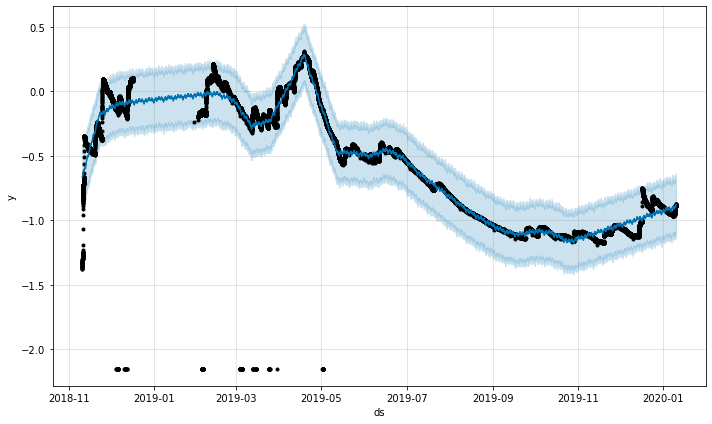

In [30]:
forecast = model_fb.predict(df_fb)

model_fb.plot(forecast);

In [21]:
model_fb.plot_components(forecast);

NameError: ignored

In [31]:
# Merge actual and predicted values
performance = pd.merge(df_fb, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# # Check MAE value
# performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
# print(f'The MAE for the model is {performance_MAE}')

# # Check MAPE value
# performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
# print(f'The MAPE for the model is {performance_MAPE}')

In [32]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

# Check the number of anomalies
performance['anomaly'].value_counts()

0    60618
1      673
Name: anomaly, dtype: int64

In [33]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
0,2018-11-10 11:40:00,-1.381,-0.662915,-0.885740,-0.448926,1
1,2018-11-10 11:50:00,-1.379,-0.662923,-0.887043,-0.455472,1
2,2018-11-10 12:00:00,-1.372,-0.662911,-0.884240,-0.447386,1
3,2018-11-10 12:10:00,-1.372,-0.662878,-0.896469,-0.450087,1
4,2018-11-10 12:20:00,-1.364,-0.662824,-0.876469,-0.452003,1
...,...,...,...,...,...,...
57846,2019-12-17 04:40:00,-0.763,-0.987097,-1.212878,-0.783116,1
57847,2019-12-17 04:50:00,-0.768,-0.986979,-1.204951,-0.782934,1
57852,2019-12-17 05:40:00,-0.766,-0.985642,-1.209576,-0.774433,1
57855,2019-12-17 06:10:00,-0.773,-0.984270,-1.209974,-0.774047,1


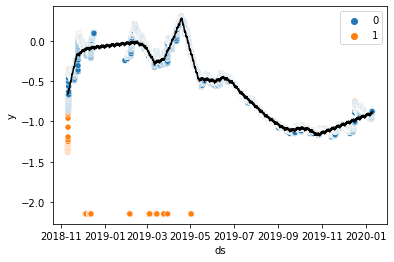

In [34]:
import seaborn as sns

sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')

In [35]:
performance

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
0,2018-11-10 11:40:00,-1.381,-0.662915,-0.885740,-0.448926,1
1,2018-11-10 11:50:00,-1.379,-0.662923,-0.887043,-0.455472,1
2,2018-11-10 12:00:00,-1.372,-0.662911,-0.884240,-0.447386,1
3,2018-11-10 12:10:00,-1.372,-0.662878,-0.896469,-0.450087,1
4,2018-11-10 12:20:00,-1.364,-0.662824,-0.876469,-0.452003,1
...,...,...,...,...,...,...
61286,2020-01-10 02:00:00,-0.876,-0.877812,-1.111169,-0.650673,0
61287,2020-01-10 02:10:00,-0.886,-0.877686,-1.101980,-0.635912,0
61288,2020-01-10 02:20:00,-0.881,-0.877619,-1.079092,-0.639257,0
61289,2020-01-10 02:30:00,-0.878,-0.877607,-1.089021,-0.652754,0


## Isolation Forest

In [36]:
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [37]:
df_if = df
df_if

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,-1.381,30.7
2018-11-10 11:50:00,0.0,3.2,-1.379,30.7
2018-11-10 12:00:00,0.0,3.2,-1.372,30.7
2018-11-10 12:10:00,0.0,3.2,-1.372,31.1
2018-11-10 12:20:00,0.0,3.2,-1.364,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
2020-01-10 02:20:00,0.0,29.0,-0.881,29.5


In [38]:
model_if = IsolationForest(contamination=float(0.004), random_state=42)

In [39]:
model_if.fit(df[['gwl']])

ValueError: ignored

In [ ]:
df_if['anomaly'] = model_if.predict(df[['gwl']])
df_if

In [ ]:
df_if[df_if['anomaly']==-1]['gwl']

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df['gwl'])
plt.scatter(df_if[df_if['anomaly']==-1].index, df_if[df_if['anomaly']==-1]['gwl'], color='orange')

## Thresholding

In [ ]:
df_th = pd.read_pickle("clean/" + location + ".pkl")
df_th

In [ ]:
df_th = df_th.drop(['location'], axis=1)
df_th

In [ ]:
ma = [5, 10, 20, 30, 40, 50, 100]

for n in ma:
    df_th[('gwl_ma%d' % n)] = df_th['gwl'].rolling(n).mean().ffill().bfill()

df_th

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df_th['gwl'])

for n in ma:
    plt.plot(df_th[('gwl_ma%d' % n)])
    
plt.legend()

## Boxplot

In [ ]:
plt.plot(df['gwl'])

In [ ]:
plt.boxplot(df['gwl'])

# Anomaly removal

Using Facebook Prophets anomaly detection to find outliers in time series. Outliers will be removed for imputation

In [ ]:
performance

In [ ]:
df['anomaly'] = performance['anomaly']
df

In [ ]:
df['gwl'].mask(df['anomaly']==1, np.nan, inplace=True)
df

In [ ]:
plt.plot(df['gwl'])

In [ ]:
plt.hist(df['gwl'])

In [ ]:
df['gwl'].isna().sum()

In [ ]:
# df.to_pickle("anomaly/" + location + ".pkl")

In [ ]:
names